# STATS 131 Project: Kickstarter
Team 15: HALLO

Data: https://www.kaggle.com/kemical/kickstarter-projects/

Presentation:

Members: 
Kai Chen Tan,
Qi Jing Yap,
Yuqing Yang,
Steven Salmeron

# Data Background
## What is Kickstarter?

Kickstarter is a fundraising platform with the goal of helping to “bring creative projects to life”, by providing a way for artists to be funded directly by fans of the project. This is done through a campaign, a page where an artist outlines their project, what its purpose is, how much money they need to complete it and what this money will be used for, how much time they plan on giving the campaign to raise its funding goal, and why people should help fund it, including rewards for pledging certain amounts and potential stretch goals past the initial goal to enhance the project. The platform launched on April 28, 2009 and has seen over 450,000 projects pass through it.

## Basics of a Kickstarter Project

Each campaign has a unique Kickstarter ID used for internal identification, and each project has a name, although this does not have to be unique and only needs to title a project for people to find and refer to it with. A campaign also makes itself easier to distinguish from others through the use of categories. Kickstarter has 15 main categories to choose from: Art, Comics, Crafts, Dance, Design, Fashion, Film & Video, Food, Games, Journalism, Music, Photography, Publishing, Technology, and Theater. Subcategories are also attached to a project to further classify it past the main category. These include one such as footwear, accessories, and jewelry as 3 under fashion and games allowing categories based on genre and platform/medium. 

When a campaign starts, the team behind the project use methods, such as social media and email lists, to attract people to the campaign and get them interested. People who help fund a project are known as its ‘backers’ and the money they contribute is their ‘pledge’. Backing a project both allows the person to contribute to sometime they wish to see succeed and usually provides a reward if high enough. Rewards are usually tiered to match the amount pledged and often include things such as related merchandise (tote bags or t-shirts with the project’s logo), the project itself when it is some sort of product, or their name in the credits for the project. Project start with a specific goal for their campaign: an amount the team has determined to be the minimum they need to proceed with the project.
    
Because Kickstarter is a global platform and projects can be started in 22 different countries, not all campaigns are measured in USD. Kickstarter converts non USD currency numbers to USD based on conversion rates at the time of recording for use in their metrics, but does save the original numbers, currency, and country. A project has a date and time when it is launched, of course, as well as a deadline: a date and time when the project can longer receiving pledges. A project that reaches its goal by the deadline is a success and receives the pledged funding. Projects that fail to meet their goal receive no funding and Kickstarter will not collect funds from the backers; this is a failed project. This all-or-nothing model is meant to prevent disappointment in scenarios where a team may attempt to proceed with a project when only a tenth of the goal was reached and can no longer meet the standards that backers may have been expecting. More ambitious projects instead set a minimum goal and include stretch goals in their campaign: funding milestones where additional features not exactly necessary for the project will be worked on if reached. Of course, a project can be cancelled early if the team running it decided they would prefer not to continue it. Kickstarter may also suspend a campaign if upon further review, they decide it is in violation of one of their rules. 

## Our Dataset

The dataset being analyzed here comes from a  Kaggle user, Mickaël Mouillé, and contains information about over 300,000 Kickstarter projects. Variables include most of what is described about projects above. 
- <font color=blue>ID</font> and <font color=blue>name</font>  are self explanatory. 
- <font color=blue>category</font> and <font color=blue>main_category</font> both give the one category and sub category a project is classified under.
    - There are 15 categories, which are listed above. Each one has from 5 to 20 subcategories.
- Currency and country use the abbreviation for the correct country of origin and currency used in the campaign <font color=blue>pledged</font> shows the amount raised in the native currency.
    - <font color=blue>usd_pledged</font>, which is the amount pledged total, and <font color=blue>goal</font>, amount needed to succeed, are both already converted into USD by Kickstarter as detailed above. 
        - The dataset also includes a version of these variables with converstions done by fixer.io, <font color=blue>usd_pledged_real</font> and <font color=blue>usd_goal_real</font>,which we use instead for our analysis.
- <font color=blue>launched</font> and <font color=blue>deadline</font> give the date and time the project was started and ended, respectively, in a “year-month-day hour:minute:second” format. 
- State shows whether the campaign ended successfully, failed, was cancelled, or was suspended. 
    - Some are also labeled as live, meaning the campaign was still ongoing, and undefined. 
The data was directly taken from the Kickstarter website itself and contains data from as early as the websites beginning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kickstarter = pd.read_csv('ks-projects-201801.csv') #Reading in the data

# Data Cleaning

In [3]:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
kickstarter.shape

(378661, 15)

### 1. Drop Columns

In [5]:
## Data Cleaningkickstarter = kickstarter.drop(columns = ['pledged', 'usd pledged','goal'])
kickstarter.shape

(378661, 15)

why we drop the columns
now we gather index that we want to remove...

### 2. Data Types

### 3. Check for Missing Values

In [6]:
print(kickstarter[kickstarter.duplicated()])
print(kickstarter.isna().sum()) # check for NAs## Data Cleaning
index_A = kickstarter[kickstarter.name.isna()].index

Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real]
Index: []
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


We observe that while there are no completely duplicated rows in our DataFrame, we also find that there are 4 NAs on our <font color='blue'>name</font> column,  We have saved the indexes of these repeated rows for later deletion.

We also noticed 3797 NAs in our <font color='blue'>usd pledged</font> column (which we will not be using as earlier mentioned).

### 4. Check Problematic Rows

#### (a)

In [7]:
## Data Cleaning## Data Cleaning## Data Cleaningprint(kickstarter['ID'].nunique())
print(kickstarter['name'].nunique()) #strange, ~3000 rows seem to have duplicated names with unique IDs

print(kickstarter[kickstarter['ID'].duplicated(keep = False)].sort_values(by = 'ID'))
kickstarter[kickstarter['name'].duplicated(keep = False)].sort_values(by = 'name').head()


375764
Empty DataFrame
Columns: [ID, name, category, main_category, currency, deadline, goal, launched, pledged, state, backers, country, usd pledged, usd_pledged_real, usd_goal_real]
Index: []


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0,US,0.0,0.0,6500.0
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3,US,37.0,37.0,6500.0
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24,US,3000.0,3000.0,3000.0
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26,US,1417.0,1417.0,5000.0
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1,US,100.0,100.0,100000.0


We also notice an interesting finding: While the <font color='blue'>ID</font> column had 378661 entries with no duplicates, there were about 2897 instances of repeated <font color='blue'>name</font> in our dataset. We will investigate this further later on.

#### (b)

In [8]:
print(kickstarter.launched.sort_values().head(10))
index_B = kickstarter.launched.sort_values()[0:7].index

75397     1970-01-01 01:00:00
319002    1970-01-01 01:00:00
2842      1970-01-01 01:00:00
94579     1970-01-01 01:00:00
247913    1970-01-01 01:00:00
273779    1970-01-01 01:00:00
48147     1970-01-01 01:00:00
169268    2009-04-21 21:02:48
322000    2009-04-23 00:07:53
138572    2009-04-24 21:52:03
Name: launched, dtype: object


When exploring the data, we also discovered that 7 of the projects had a <font color='blue'>launched</font> date in the year 1970. Since Kickstarter was only founded in 2009, these results are not possible. We have also saved these indexes.

#### (c)

In [9]:
## Data Cleaning
success = kickstarter[kickstarter['usd_pledged_real'] >= kickstarter['usd_goal_real']] 
wrong = success[success['state']=='failed']
index_C = wrong.index
wrong.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
16780,1085047405,"""Balance""",Jazz,Music,USD,2013-04-04,23000.0,2013-03-05 10:55:56,23020.01,failed,141,US,23020.01,23020.01,23000.0
58558,1297794474,Music Empowers - A Day with the Accende Ensemble,Classical Music,Music,USD,2012-01-04,3000.0,2011-11-07 15:20:24,3087.50,failed,20,US,3087.50,3087.50,3000.0
136909,1695255515,"POPE! an epic musical, opening at NY Fringe Fe...",Theater,Theater,USD,2010-08-20,3600.0,2010-07-21 05:48:11,3600.00,failed,30,US,3600.00,3600.00,3600.0
216545,2103203254,The new face of Canadian Science Fiction,Fiction,Publishing,USD,2010-05-16,10000.0,2010-03-18 04:35:31,10797.00,failed,66,US,10797.00,10797.00,10000.0
298960,59246799,Key Wrench - Unlock Your Life!,Product Design,Design,USD,2013-10-04,6000.0,2013-08-24 05:42:10,6183.00,failed,208,US,6183.00,6183.00,6000.0


We further identified and saved rows where projects had their <font color = 'blue'>usd_pledged_real</font> meeting their <font color = 'blue'>usd_goal_real</font>, yet were considered failed. This is an error, since Kickstarter by definition awards projects who met their goals as successful. A good example of this can be found in the following link.

https://www.kickstarter.com/projects/1755876060/music-empowers-a-day-with-the-accende-ensemble/ (3,087 pledged of 3,000 goal, "Funding Unsuccessful")

#### (d)

In [10]:
## Data Cleaning
undefined = kickstarter[kickstarter['state'] == 'undefined']
print(undefined.country.unique())
index_D = kickstarter[kickstarter.country == 'N,0"'].index

['N,0"']


Finally, we saved the rows with a nonsensical country code of 'N,0'. Interestingly, these rows also contain the same rows where the <font color='blue'>state</font> was considered 'undefined'.

### 5. Remove Problematic Rows

In [11]:
## Data Cleaning## Data Cleaning
allindexes_remove = list(index_A) + list(index_B) + list(index_C) + list(index_D)
print(len(set(allindexes_remove)))
print(len(allindexes_remove) == len(set(allindexes_remove)))
kickstarter_cleaned = kickstarter.drop(labels=allindexes_remove)
kickstarter_cleaned.shape

3814
True


(374847, 15)

Now, we have removed the 3814 rows corresponding to all the indexes saved above. After filtering our dataset, the shape of our DataFrame has gone from (378661,15) to (374847, 15), a removal of approximately 1.01% of the original data.

### 6. Feature Engineering

In order to prepare the data for further analysis and modeling, we also create new features from existing ones. The list of features created are as follows:

1. <font color = 'blue'>project_length</font>: This feature tracks the number of days between a project's launch date and deadline where a project was active for. We also checked for negative values, which did not exist thankfully.
2. <font color = 'blue'>pledged_per_backer</font>: This feature tracks the mean amount of money (converted to USD) pledged by each individual backer. We have also removed rows with <font color = 'blue'>pledged_per_backer</font> listed as Inf, as these are caused by projects with 0 backers.

In [12]:
kickstarter_cleaned['deadline'] = pd.to_datetime(kickstarter_cleaned.deadline)
kickstarter_cleaned['launched'] = pd.to_datetime(kickstarter_cleaned.launched)
kickstarter_cleaned['project_length'] = kickstarter_cleaned['deadline'] - kickstarter_cleaned['launched']
print(kickstarter_cleaned.project_length.sort_values()) #no negative days
kickstarter_cleaned['project_length'] = kickstarter_cleaned.project_length.dt.days

kickstarter_cleaned['pledged_per_backer'] = kickstarter_cleaned['usd_pledged_real'] / kickstarter_cleaned['backers']
kickstarter_cleaned = kickstarter_cleaned[~kickstarter_cleaned.isin([np.nan, np.inf, -np.inf]).any(1)]

156430    0 days 00:07:17
180186    0 days 00:51:07
182763    0 days 01:42:57
65731     0 days 01:48:40
370904    0 days 02:15:07
172743    0 days 02:15:14
70034     0 days 02:17:45
197881    0 days 02:22:06
244237    0 days 02:43:30
37608     0 days 02:52:48
312550    0 days 03:02:18
156411    0 days 03:11:21
322948    0 days 04:00:25
365411    0 days 04:29:43
129319    0 days 04:31:24
899       0 days 04:56:21
357036    0 days 05:00:42
190908    0 days 05:04:50
20984     0 days 05:04:56
335318    0 days 05:12:50
128829    0 days 05:19:16
118408    0 days 05:39:16
246603    0 days 05:42:44
268704    0 days 05:44:46
184581    0 days 05:47:35
363529    0 days 05:54:09
372363    0 days 05:54:20
34578     0 days 06:03:33
281394    0 days 06:17:51
155041    0 days 06:33:54
               ...       
328866   90 days 23:51:08
374626   90 days 23:51:18
200266   90 days 23:51:23
9583     90 days 23:55:12
241476   90 days 23:56:29
140080   90 days 23:58:13
291590   90 days 23:58:42
327808   90 

# Exploratory Analysis of the Data

### Guiding Question 1: Which catgory is the most well-funded?

### Frequency of Project v.s. Category

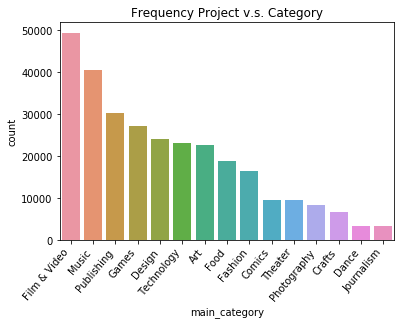

In [28]:
freq_category = sns.countplot(projects.main_category,order = projects['main_category'].value_counts().index)
freq_category.set_xticklabels(freq_category.get_xticklabels(), rotation=50,horizontalalignment='right')
freq_category.set_title("Frequency Project v.s. Category")
plt.show()

### Success Rate by Category

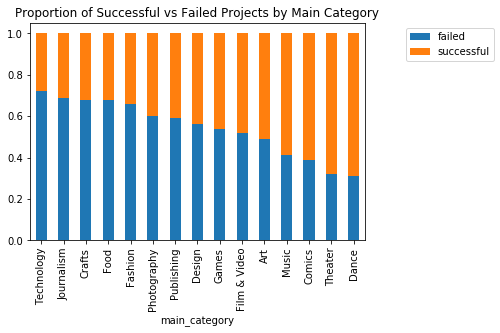

In [13]:
projects = kickstarter_cleaned[(kickstarter_cleaned['state'] == 'failed') | (kickstarter_cleaned['state'] == 'successful')]

grouped = projects.groupby(['main_category','state']).ID.count()
total = projects.groupby('main_category').state.count()
prop = np.round((grouped/total),2).unstack().sort_values(by='successful')
#print(prop.std())
#print(prop.mean()) 

prop.plot(kind='bar',stacked=True)
plt.title('Proportion of Successful vs Failed Projects by Main Category')
plt.legend(loc='upper right',bbox_to_anchor=(1.4,1))
plt.show()# Exploratory Analysis

### Amount pledged v.s. Category

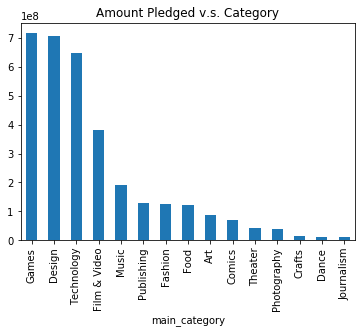

In [27]:
pledged = projects.groupby(['main_category']).usd_pledged_real.sum().sort_values(ascending=False)
pledged.plot(kind="bar")
plt.title("Amount Pledged v.s. Category")
plt.show()

### Average Amount Pledged v.s. Category

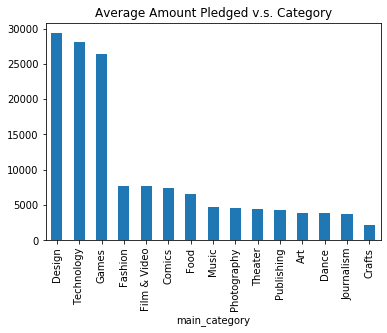

In [16]:
avg_pledged = projects.groupby(['main_category']).usd_pledged_real.mean().sort_values(ascending=False)
avg_pledged
avg_pledged.plot(kind="bar")
plt.title("Average Amount Pledged v.s. Category")
plt.show()

### Average Amount Pledged per Backer v.s. Category

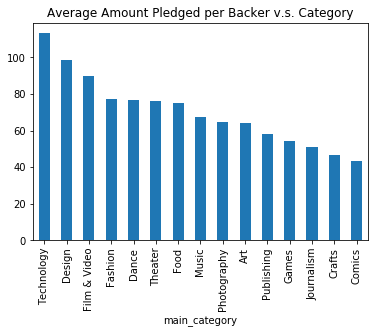

In [17]:
avg_pledged_backer = projects.groupby(['main_category']).pledged_per_backer.mean().sort_values(ascending=False)
avg_pledged_backer
avg_pledged_backer.plot(kind="bar")
plt.title("Average Amount Pledged per Backer v.s. Category")
plt.show()

### Guiding Question 2: Exploring unexpected success

### Guiding Question 3: What are some factors that may impact the outcome of a project?

### Average Project Goal v.s. Category

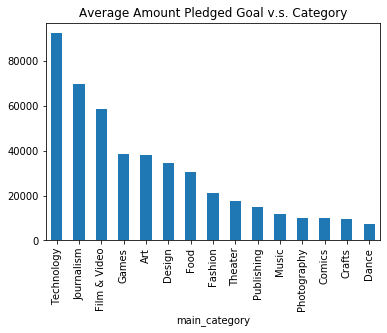

In [18]:
avg_pledged_goal = projects.groupby(['main_category']).usd_goal_real.mean().sort_values(ascending=False)
avg_pledged_goal
avg_pledged_goal.plot(kind="bar")
plt.title("Average Amount Pledged Goal v.s. Category")
plt.show()

### Average Pledged per Backer by Category

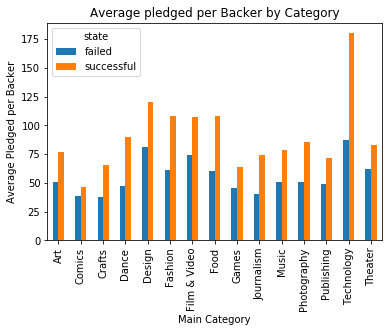

In [34]:
A = projects.groupby(['main_category','state']).pledged_per_backer.mean().unstack()
A.plot(kind="bar")### Average Project Goal v.s. Category
plt.title("Average pledged per Backer by Category")
plt.ylabel("Average Pledged per Backer")
plt.xlabel("Main Category")
plt.show()

# Data Modeling

In [19]:
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LassoCV

In order to preprocess our data for modeling whether a project will be 'successful' or 'failed', we will have to filter our dataset to only include projects with the feature <font color = 'blue'>state</font> equal to one of these two. Because of the nature of the smf module, we will gave to convert the values to 1 or 0.

In [20]:
clean_state = {'state': {'failed': 0, "successful": 1}}
kickstarter_cleaned.replace(clean_state, inplace=True)
kickstarter_fail_successful = kickstarter_cleaned[(kickstarter_cleaned.state == 1) | (kickstarter_cleaned.state == 0)] 

(TO BE CONFIRMED) We have also filtered the data to only include projects with <font color = 'blue'>main_category</font> equal to 'Games'. This allows us to create a less computationally expensive model and a model that can identify important subcategories (the feature <font color = 'blue'>category</font>) within the 'Games' <font color = 'blue'>main_category</font>.

In [21]:
kickstarter_games = kickstarter_fail_successful[kickstarter_fail_successful['main_category'] == 'Games']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(kickstarter_games[['ID','name','category','main_category','currency','deadline','launched','backers','country','usd_pledged_real','usd_goal_real','project_length','pledged_per_backer']],kickstarter_games[['state']], test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

y_train['state'] = y_train.state.apply(int)
y_test['state'] = y_test.state.apply(int)

(18932, 13) (18932, 1)
(8115, 13) (8115, 1)


In [23]:
logitmodel = smf.logit(formula = 'state ~ category + usd_goal_real + project_length + pledged_per_backer', data = pd.concat([X_train, y_train], axis=1))
results = logitmodel.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.592662
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  state   No. Observations:                18932
Model:                          Logit   Df Residuals:                    18921
Method:                           MLE   Df Model:                           10
Date:                Tue, 26 Nov 2019   Pseudo R-squ.:                  0.1416
Time:                        19:08:41   Log-Likelihood:                -11220.
converged:                       True   LL-Null:                       -13072.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.2983      0.076      3.915      0.000   

In [24]:
testresult_logit = results.predict(X_test)
testresult_logit = np.where(testresult_logit > 0.5, 1, 0)
np.mean(testresult_logit == y_test.state.to_numpy()) #~70% accuracy on test dataset

0.7083179297597042

In [25]:
y_test.state.value_counts().iloc[0]/(y_test.state.value_counts().iloc[0] + y_test.state.value_counts().iloc[1])

0.5383857054836723

After splitting our results into a train and test set, we obtain an accuracy of ~70% on the test dataset. TO DO: Crossvalidation to verify our results (but based on running this code multiple times the 70% appears to hold steady). This result is indeed significant, as our model predictions represent a noticeable improvement in accuracy (compared to merely predicting 'failed' or 'successful' for all of the test data, ~53%)